# **TikTok project: Exploratory data analysis**

In this activity, we will examine data provided and prepare it for analysis. We will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Our mission is to continue the investigation we began and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

*   What methods are best for identifying outliers?


* **Investigate the `mean()` and `median()` of the data and understand range of data values.**
* **Use a boxplot/histogram to visualize the distribution of the data.**


*   How do we make the decision to keep or exclude outliers from any future models?

**We either delete them, reassign (by imputing average or by creating a floor and ceiling at a quantile) them or leave them depending on their nature and the size of the dataset.**

* **If we are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then we are more likely to decide to delete outliers.**

* **If the dataset is small and/or the data will be used for modeling or machine learning, we are more likely to choose a path of deriving new values to replace the outlier values.**

* **If we plan to do EDA/analysis on a dataset and nothing else, or if we are preparing a dataset for a model that is resistant to outliers, it is most likely that we are going to leave them in.**

### **Imports and loading**
Import the data and packages that would be most helpful for EDA of the data.

In [90]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **Data exploration and cleaning**

Assess the data.

In [92]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [93]:
# Get the size of the data
data.size

232584

In [94]:
# Get the shape of the data
data.shape

(19382, 12)

In [95]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [96]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Data visualization**

Which data visualization makes the most sense for EDA of the TLC dataset?

What type of data visualization(s) would be most helpful? 

**As shown below, box plots and histograms will be most helpful in our understanding of this data's distribution.** 

**Visualizations of data distribution will guide us during data analysis, for example, regarding the kind of model needed.**

### **Build visualizations**

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

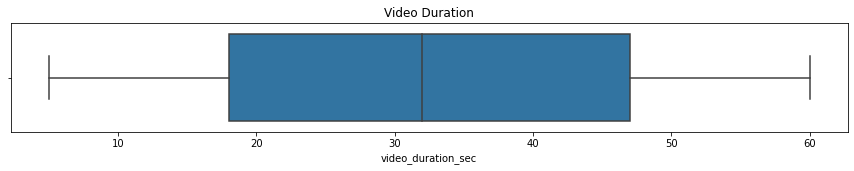

In [97]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(15,2))
box = sns.boxplot(x=data['video_duration_sec'])
plt.title('Video Duration');

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

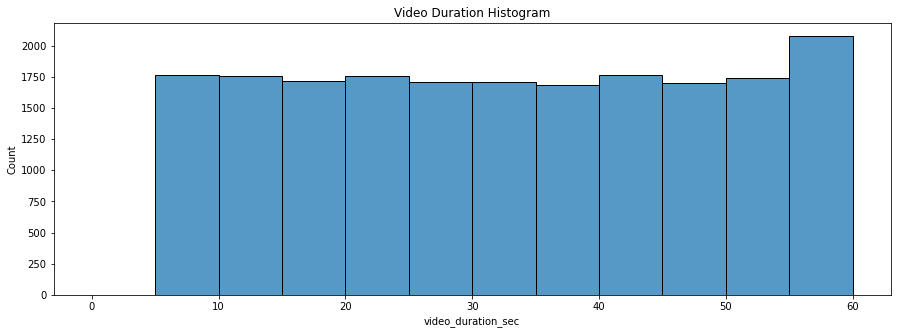

In [98]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video Duration Histogram');

**Question:** What do we notice about the duration and distribution of the videos?

Videos are 5-60 seconds in length, and the distribution is uniform.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

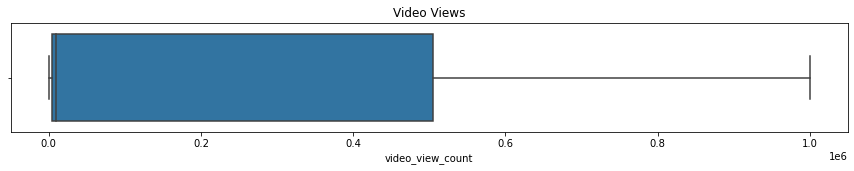

In [99]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(15,2))
box = sns.boxplot(x=data['video_view_count'])
plt.title('Video Views');

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

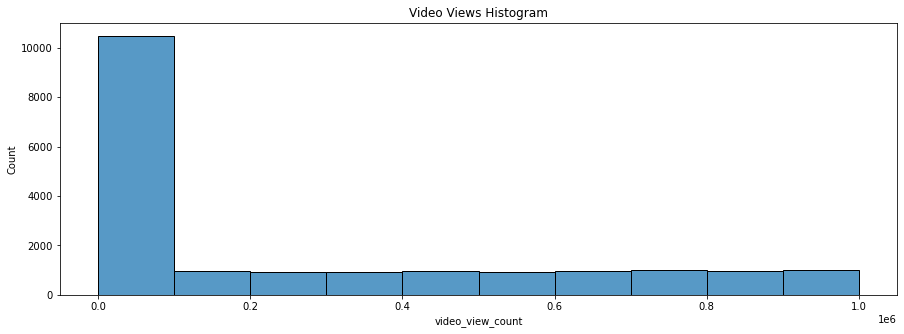

In [100]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video Views Histogram');

**Question:** What do we notice about the distribution of this variable?

The distribution is uneven, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

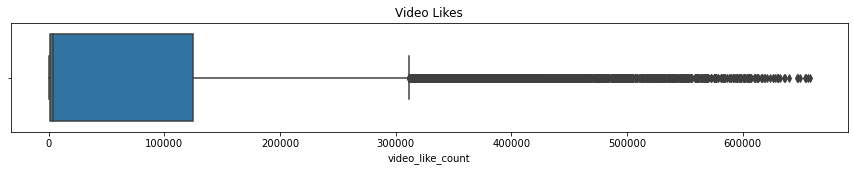

In [101]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(15,2))
box = sns.boxplot(x=data['video_like_count'])
plt.title('Video Likes');

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

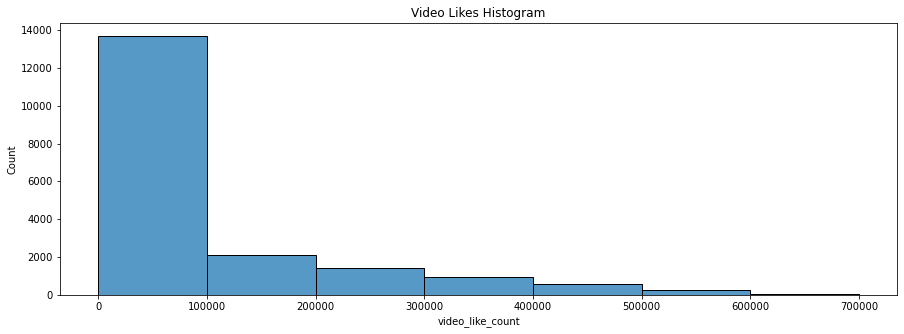

In [102]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
plt.title('Video Likes Histogram');

**Question:** What do we notice about the distribution of this variable?

The distribution is uneven, with more than half the videos receiving fewer than 100,000 likes. Distribution of the data skews rightwards.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

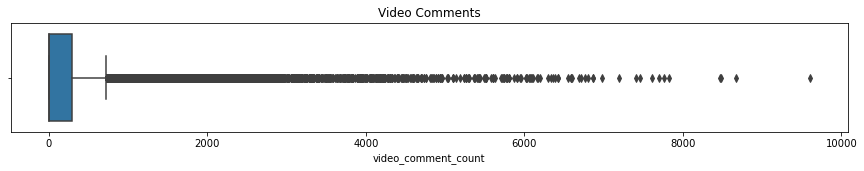

In [103]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(15,2))
box = sns.boxplot(x=data['video_comment_count'])
plt.title('Video Comments');

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

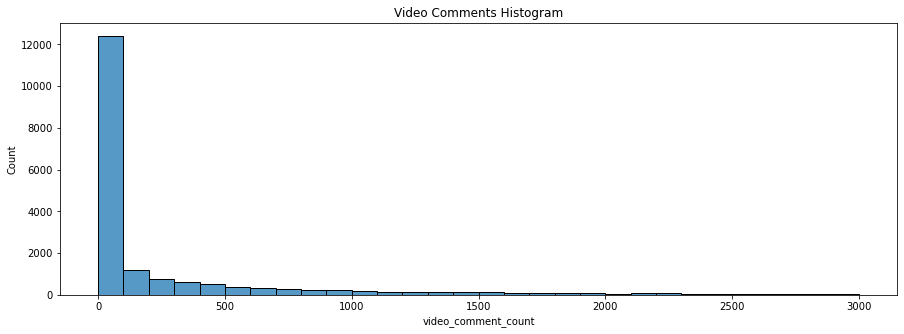

In [104]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data['video_comment_count'], bins=range(0,3001,100))
plt.title('Video Comments Histogram');

**Question:** What do we notice about the distribution of this variable?

Again, the distribution is very right-skewed. Majority of the videos receives 0-100 comments.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

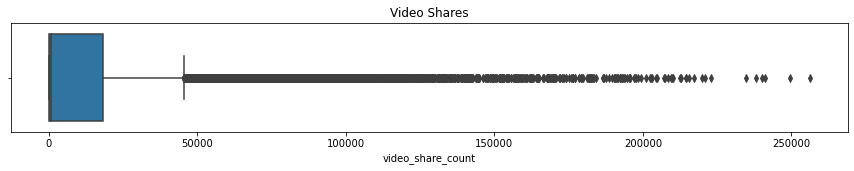

In [105]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(15,2))
box = sns.boxplot(x=data['video_share_count'])
plt.title('Video Shares');

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

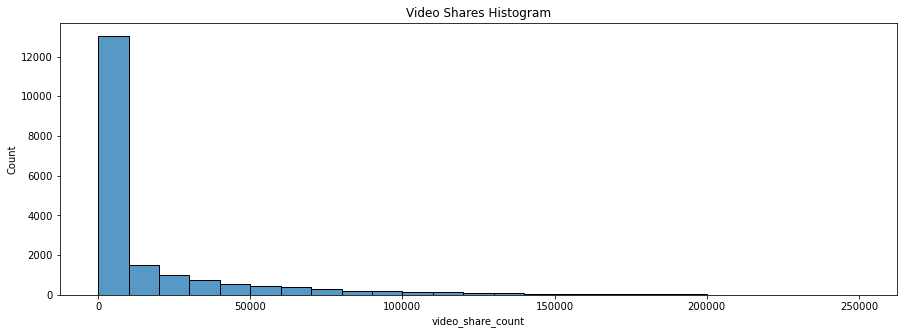

In [106]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data['video_share_count'], bins=range(0,(25*10**4+1),10**4))
plt.title('Video Shares Histogram');

**Question:** What do we notice about the distribution of this variable?

Similar to the variable distributions above, this one is also right-skewed, with majority of the videos having share count < 10,000.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

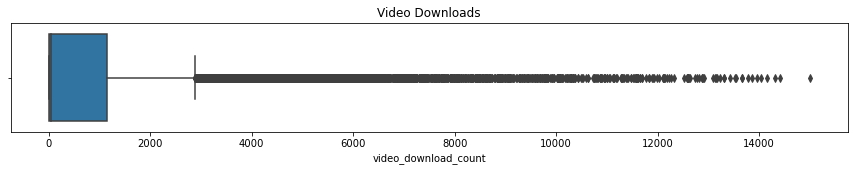

In [107]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(15,2))
box = sns.boxplot(x=data['video_download_count'])
plt.title('Video Downloads');

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

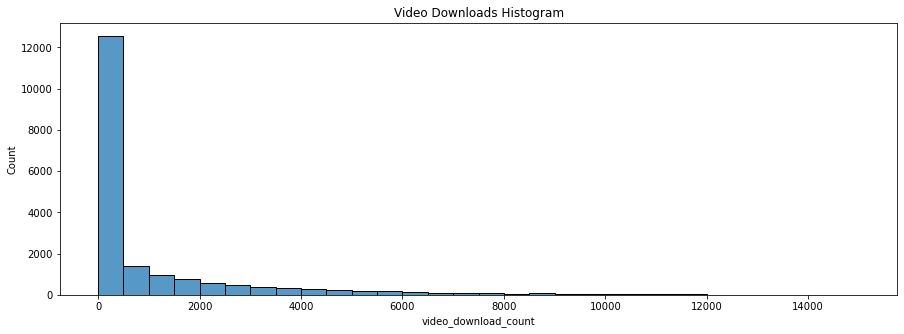

In [108]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data['video_download_count'], bins=range(0,(15*10**3+1),500))
plt.title('Video Downloads Histogram');

**Question:** What do we notice about the distribution of this variable?

Again, the distribution is right-skewed, with majority of videos downloaded fewer than 500 times.

#### **Claim status by verification status**

Create a histogram with four bars: one for each combination of claim status and verification status.

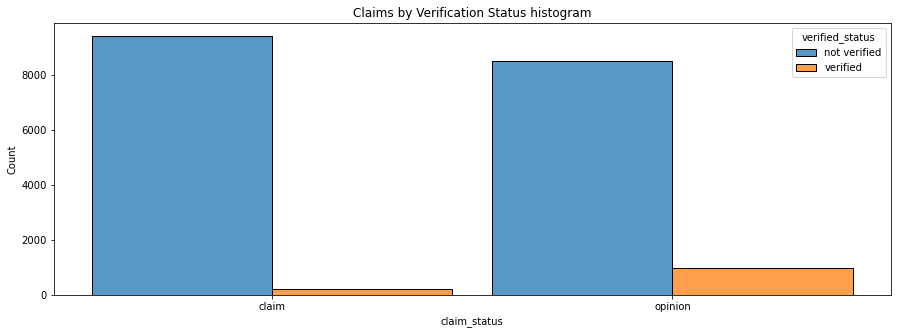

In [109]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by Verification Status histogram');

**Question:** What do we notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

The unverified users are way more than verified ones. Verified users are much more likely to post opinions.

#### **Claim status by author ban status**

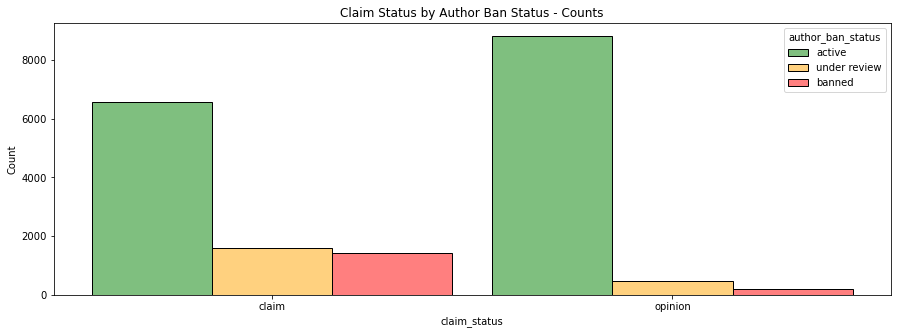

In [110]:
# Create a histogram
plt.figure(figsize=(15,5))
sns.histplot(data=data,
             x='claim_status',
             hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim Status by Author Ban Status - Counts');

**Question:** What do we notice about the number of active authors compared to banned authors for both claims and opinions?

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

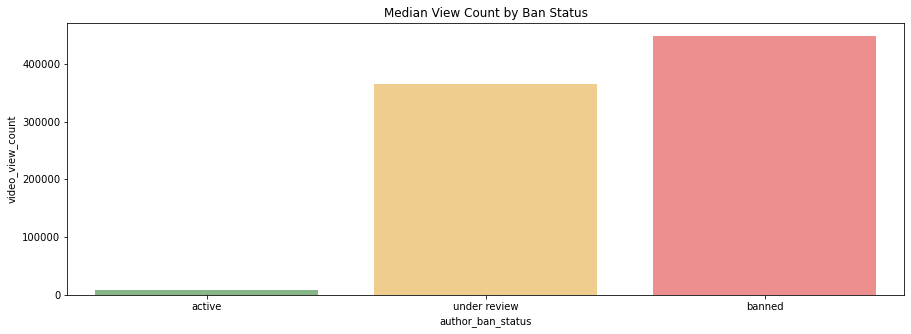

In [111]:
# Create a bar plot
ban_status_counts = data.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

fig = plt.figure(figsize=(15,5))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median View Count by Ban Status');

**Question:** What do we notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

Active authors have very less number of views compared to non-active ones.

Since non-active authors are more likely to post claims, and videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of claim status.

A quick check of the median view count by claim status bears out this assessment:

In [112]:
# Calculate the median view count for claim status.
data.groupby(['claim_status']).median()[['video_view_count']]

,video_view_count
claim_status,
claim,501555.0
opinion,4953.0


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

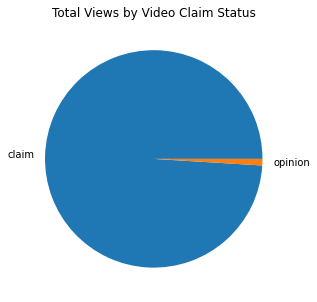

In [113]:
fig = plt.figure(figsize=(5,5))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total Views by Video Claim Status');

**Question:** What do we notice about the overall view count for claim status?

Despite the face that there is same number of each video in the dataset, the overall view count is dominated by claim videos.

### **Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if we were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis we've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of our data points could be considered outliers. The definition of an outlier can change based on the details of our project, and it helps to have domain expertise to decide a threshold. A common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if we used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

In [114]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**
[Link to Tableau visualization](https://public.tableau.com/views/EDA-TikTok_17054205844630/EDA?:language=en-US&:display_count=n&:origin=viz_share_link)

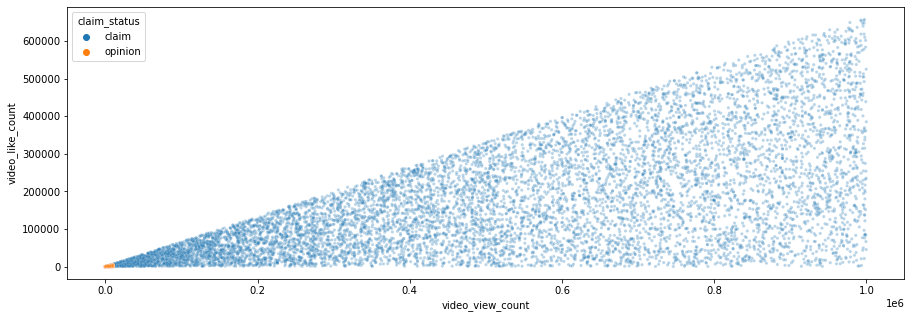

In [115]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(15,5))
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

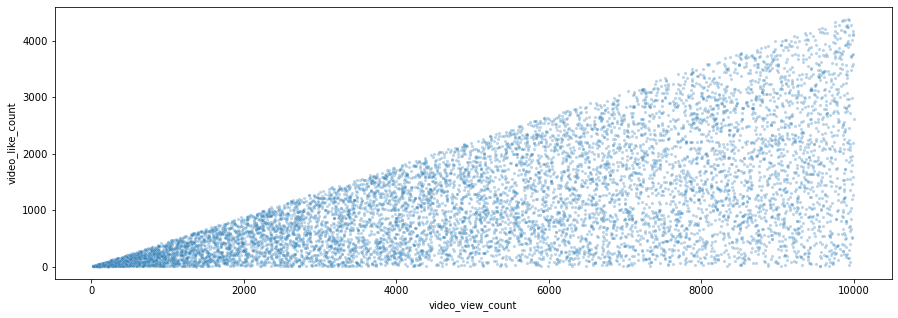

In [116]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
plt.figure(figsize=(15,5))
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

### **Results and evaluation**

What have we learned about the dataset? 

What other questions have your visualizations uncovered that you should pursue?

Learned .... **examination of the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. Also, analyzed correlations between variables, particularly between the claim_status variable and others.**

Other questions are .... **further investigate distinctive characteristics that apply only to claims or only to opinions. Also, consider other variables that might be helpful in understanding the data.**

Client would likely want to know ... **the assumptions regarding what data might be predictive of claim_status.**